In [100]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from argparse import Namespace
import warnings

warnings.filterwarnings('ignore')

In [101]:
DATA_DIR_BASELINE = os.path.join('gait_baseline_dataset.csv')
gait_baseline_dataset = pd.read_csv(DATA_DIR_BASELINE, usecols=['gait_avg','gait_cv','label'])
gait_baseline_dataset

,gait_avg,gait_cv,label
0,1.030661,1.722080,old_general
1,1.167703,4.317442,old_general
2,0.940825,3.207935,old_general
3,0.956881,1.921659,old_general
4,1.042140,1.574442,old_general
5,1.250556,6.383168,old_parkinson
6,1.057805,4.765606,old_parkinson
7,1.369439,10.256574,old_parkinson
8,0.965625,8.212027,old_parkinson
9,1.134138,3.685808,old_parkinson


In [102]:
# add_parkinson = gait_baseline_dataset[gait_baseline_dataset['label']=='old_parkinson']
# gait_baseline_dataset = pd.concat([gait_baseline_dataset,add_parkinson])
# gait_baseline_dataset

gait_baseline_dataset = gait_baseline_dataset[gait_baseline_dataset['label']!='young_general']
# gait_baseline_dataset = pd.concat([gait_baseline_dataset,gait_baseline_dataset])
gait_baseline_dataset

,gait_avg,gait_cv,label
0,1.030661,1.722080,old_general
1,1.167703,4.317442,old_general
2,0.940825,3.207935,old_general
3,0.956881,1.921659,old_general
4,1.042140,1.574442,old_general
5,1.250556,6.383168,old_parkinson
6,1.057805,4.765606,old_parkinson
7,1.369439,10.256574,old_parkinson
8,0.965625,8.212027,old_parkinson
9,1.134138,3.685808,old_parkinson


In [103]:
# pre-processing dataset
# mapping = {'young_general':0, 'old_general':0, 'old_parkinson':1}
# gait_baseline = gait_baseline_dataset
# gait_baseline['label'] = gait_baseline['label'].map(mapping)
# gait_baseline

mapping = {'old_general':0, 'old_parkinson':1}
gait_baseline = gait_baseline_dataset
gait_baseline['label'] = gait_baseline['label'].map(mapping)
gait_baseline


,gait_avg,gait_cv,label
0,1.030661,1.722080,0
1,1.167703,4.317442,0
2,0.940825,3.207935,0
3,0.956881,1.921659,0
4,1.042140,1.574442,0
5,1.250556,6.383168,1
6,1.057805,4.765606,1
7,1.369439,10.256574,1
8,0.965625,8.212027,1
9,1.134138,3.685808,1


In [ ]:
# train_recall_lr = []
# test_recall_lr = []

# train_f1_lr = []
# test_f1_lr = []

# train_acc_lr = []
# test_acc_lr = []

# for i in range(30):
#     # gait_label_0 = gait_baseline[gait_baseline['label']==0]
#     # gait_label_1 = gait_baseline[gait_baseline['label']==1]
#     # gait_label_2 = gait_baseline[gait_baseline['label']==2]

#     # gait_label_0_train = gait_label_0.sample(3)
#     # gait_label_1_train = gait_label_1.sample(3)
#     # gait_label_2_train = gait_label_2.sample(3)

#     # gait_label_0_test = pd.concat([gait_label_0,gait_label_0_train])[~pd.concat([gait_label_0,gait_label_0_train]).duplicated(subset=['gait_std','gait_cv','gait_stdfd','label'],keep=False)]
#     # gait_label_1_test = pd.concat([gait_label_1,gait_label_1_train])[~pd.concat([gait_label_1,gait_label_1_train]).duplicated(subset=['gait_std','gait_cv','gait_stdfd','label'],keep=False)]
#     # gait_label_2_test = pd.concat([gait_label_2,gait_label_2_train])[~pd.concat([gait_label_2,gait_label_2_train]).duplicated(subset=['gait_std','gait_cv','gait_stdfd','label'],keep=False)]


#     # gait_baseline_train = pd.concat([gait_label_0_train, gait_label_1_train, gait_label_2_train])
#     # gait_baseline_test = pd.concat([gait_label_0_test, gait_label_1_test, gait_label_2_test])

#     # gait_baseline_train = shuffle(gait_baseline_train).reset_index(drop=True) # disrupt the order
#     # gait_baseline_test = shuffle(gait_baseline_test).reset_index(drop=True) # disrupt the order


#     # X_train = gait_baseline_train.iloc[:,0:3]
#     # y_train = gait_baseline_train.iloc[:,-1]
#     # X_test = gait_baseline_test.iloc[:,0:3]
#     # y_test = gait_baseline_test.iloc[:,-1]

#     gait_baseline = shuffle(gait_baseline).reset_index(drop=True) # disrupt the order
#     X = gait_baseline.iloc[:, 0:3]
#     Y = gait_baseline.iloc[:, -1]
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1234)

#     # normalisation
#     X_scaler = StandardScaler().fit(X_train)
#     standardized_X_train = X_scaler.transform(X_train)
#     standardized_X_test = X_scaler.transform(X_test)

#     # Initialising the model and training
#     log_reg = linear_model.LogisticRegression(penalty='l2', C=0.1,solver='sag', max_iter=100, class_weight = 'balanced',random_state=10)
#     log_reg.fit(X_train, y_train)

#     # prediction and results
#     pred_test = log_reg.predict_proba(standardized_X_test)
#     pred_train = log_reg.predict(standardized_X_train)
#     pred_test = log_reg.predict(standardized_X_test)

#     train_recall = recall_score(y_train, pred_train,average='binary')
#     train_f1 = f1_score(y_train, pred_train,average='binary')
#     train_accuracy = accuracy_score(y_train, pred_train)

#     test_recall = recall_score(y_test, pred_test,average='binary')
#     test_f1 = f1_score(y_test, pred_test,average='binary')
#     test_accuracy = accuracy_score(y_test, pred_test)

#     train_recall_i = train_recall
#     test_recall_i = test_recall

#     train_f1_i = train_f1
#     test_f1_i = test_f1

#     train_acc_i = train_accuracy
#     test_acc_i = test_accuracy

#     train_recall_lr.append(train_recall_i)
#     test_recall_lr.append(test_recall_i)
#     train_f1_lr.append(train_f1_i)
#     test_f1_lr.append(test_f1_i)
#     train_acc_lr.append(train_acc_i)
#     test_acc_lr.append(test_acc_i)

# train_recall_lr = pd.DataFrame(train_recall_lr, columns=['train_recall'])
# test_recall_lr = pd.DataFrame(test_recall_lr, columns=['test_recall'])
# train_f1_lr = pd.DataFrame(train_f1_lr, columns=['train_f1'])
# test_f1_lr = pd.DataFrame(test_f1_lr, columns = ['test_f1'])
# train_acc_lr = pd.DataFrame(train_acc_lr, columns=['train_acc'])
# test_acc_lr = pd.DataFrame(test_acc_lr, columns=['train_acc'])

# all_events_recall_logic_reg = pd.concat([train_recall_lr, test_recall_lr, train_f1_lr, test_f1_lr,train_acc_lr,test_acc_lr],axis=1)
# # all_events_recall_logic_reg.to_csv('all_events_recall_logic_reg.csv')
# all_events_recall_logic_reg.boxplot()  
# plt.ylim(0,1) 



7    1
2    0
9    1
Name: label, dtype: int64
[0 0 0]
train_recall    0.333333
test_recall     0.000000
train_f1        0.500000
test_f1         0.000000
train_acc       0.714286
test_acc        0.333333
cv_score        0.777778
dtype: float64


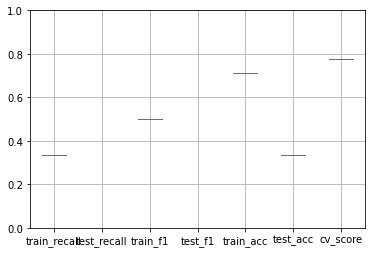

In [177]:
train_recall_lr = []
test_recall_lr = []

train_f1_lr = []
test_f1_lr = []

train_acc_lr = []
test_acc_lr = []

cv_score = []
auc_score = []

for i in range(1):
    gait_label_0 = gait_baseline[gait_baseline['label']==0]
    gait_label_1 = gait_baseline[gait_baseline['label']==1]

    gait_label_0_train = gait_label_0
    gait_label_1_train = gait_label_1

    gait_baseline_model_dataset = pd.concat([gait_label_0_train, gait_label_1_train])

    gait_baseline_model_dataset = shuffle(gait_baseline_model_dataset).reset_index(drop=True) # disrupt the order

    X = gait_baseline_model_dataset.iloc[:, 0:-1]
    Y = gait_baseline_model_dataset.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

    # normalisation
    X_scaler = StandardScaler().fit(X_train)
    standardized_X_train = X_scaler.transform(X_train)
    standardized_X_test = X_scaler.transform(X_test)

    # Initialising the model and training
    log_reg = linear_model.LogisticRegression(penalty='l2', C=0.5,solver='liblinear', class_weight = 'balanced',random_state=10)
    log_reg.fit(X_train, y_train)

    # prediction and results
    pred_test = log_reg.predict_proba(standardized_X_test)
    pred_train = log_reg.predict(standardized_X_train)
    pred_test = log_reg.predict(standardized_X_test)

    train_recall = recall_score(y_train, pred_train,average='binary')
    train_f1 = f1_score(y_train, pred_train,average='binary')
    train_accuracy = accuracy_score(y_train, pred_train)

    test_recall = recall_score(y_test, pred_test,average='binary')
    test_f1 = f1_score(y_test, pred_test,average='binary')
    test_accuracy = accuracy_score(y_test, pred_test)

    train_recall_i = train_recall
    test_recall_i = test_recall

    train_f1_i = train_f1
    test_f1_i = test_f1

    train_acc_i = train_accuracy
    test_acc_i = test_accuracy

    train_recall_lr.append(train_recall_i)
    test_recall_lr.append(test_recall_i)
    train_f1_lr.append(train_f1_i)
    test_f1_lr.append(test_f1_i)
    train_acc_lr.append(train_acc_i)
    test_acc_lr.append(test_acc_i)

    cv_scores_i = cross_val_score(log_reg, X, Y, cv=3)
    cv_score.append(cv_scores_i.mean())

    auc_score_i = average_precision_score(y_test, pred_test)
    auc_score.append(auc_score_i)

    print(y_test)
    print(pred_test)

train_recall_lr = pd.DataFrame(train_recall_lr, columns=['train_recall'])
test_recall_lr = pd.DataFrame(test_recall_lr, columns=['test_recall'])
train_f1_lr = pd.DataFrame(train_f1_lr, columns=['train_f1'])
test_f1_lr = pd.DataFrame(test_f1_lr, columns = ['test_f1'])
train_acc_lr = pd.DataFrame(train_acc_lr, columns=['train_acc'])
test_acc_lr = pd.DataFrame(test_acc_lr, columns=['test_acc'])
cv_score = pd.DataFrame(cv_score, columns=['cv_score'])
auc_score = pd.DataFrame(auc_score, columns=['auc_score'])
all_events_recall_logic_reg = pd.concat([train_recall_lr, test_recall_lr, train_f1_lr, test_f1_lr,train_acc_lr,test_acc_lr,cv_score],axis=1)
# all_events_recall_logic_reg = pd.concat([cv_score],axis=1)
# all_events_recall_logic_reg.to_csv('result_baseline_lr.csv')
all_events_recall_logic_reg.boxplot()  
plt.ylim(0,1) 
print(all_events_recall_logic_reg.mean())

In [168]:
all_events_recall_logic_reg.to_csv('result_baseline_lr.csv')

In [ ]:
# # gait_baseline = shuffle(gait_baseline).reset_index(drop=True) # disrupt the order
# # X = gait_baseline.iloc[:, 0:3]
# # Y = gait_baseline.iloc[:, -1]
# # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# X_train = gait_baseline_train.iloc[:,0:3]
# y_train = gait_baseline_train.iloc[:,-1]
# X_test = gait_baseline_test.iloc[:,0:3]
# y_test = gait_baseline_test.iloc[:,-1]

# # normalisation
# X_scaler = StandardScaler().fit(X_train)
# standardized_X_train = X_scaler.transform(X_train)
# standardized_X_test = X_scaler.transform(X_test)

# # Initialising the model and training
# log_reg = linear_model.LogisticRegression(penalty='l2', C=0.1,solver='sag', max_iter=100, class_weight = 'balanced',random_state=10)
# log_reg.fit(X_train, y_train)

In [ ]:
# # prediction and results
# pred_test = log_reg.predict_proba(standardized_X_test)
# pred_train = log_reg.predict(standardized_X_train)
# pred_test = log_reg.predict(standardized_X_test)

# train_recall = recall_score(y_train, pred_train,average='weighted')
# train_f1 = f1_score(y_train, pred_train,average='weighted')
# train_accuracy = accuracy_score(y_train, pred_train)

# test_recall = recall_score(y_test, pred_test,average='weighted')
# test_f1 = f1_score(y_test, pred_test,average='weighted')
# test_accuracy = accuracy_score(y_test, pred_test)


In [ ]:
# print('train_recall',train_recall)
# print('test_recall',test_recall)
# print('train_f1',train_f1)
# print('test_f1',test_f1)
# print('train_accuracy',train_accuracy)
# print('test_accuracy',test_accuracy)